<a href="https://colab.research.google.com/github/smirnovaanastasia1234/MOMO_Task-3/blob/main/%D0%9C%D0%9E%D0%9C%D0%9E_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2_Cars_Moldova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическое задание №3_Часть 2_Cars Moldova**



# **Import библиотек**

In [1]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# **Загрузка данных на Google Drive**

In [2]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean.csv


# **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [3]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [4]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


In [5]:
# определим категориальные и численные столбцы
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']


In [6]:
# Кодируем категориальные данные
df[cat_columns] = df[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df[column_name] =  df[column_name].cat.codes
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,40,92,2011,4,195000.0,1800.0,2,0,7750.0,11,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,1,8550.0,8,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,1,6550.0,10,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,1,4100.0,16,12500.000000
4,23,126,2000,5,300000.0,2200.0,0,1,3490.0,22,13636.363636


In [7]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int8   
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int16(1), int64(2), int8(4)
memory usage: 1.7 MB


# **Логистическая регрессия**

In [8]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)
        
        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            x_batch   = self.add_bias(X)
            y_batch   = y
        
        for i in range(self.epochs): 

            if self.batch_size: 
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
            self.weights = self.update()  
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]
     
    #---------------------------------
    def plot_cost(self, figsize = (12,6)):
        plt.figure(figsize = figsize)
        plt.plot(self.cost,'-*')
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [9]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + np.sign(self.weights)* self.l1_penalty + l2_term)

In [10]:
_EPS_ = 1e-6

class LogisticRegression(ElasticRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 threshold = 0.5,
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)       
        self.learning_rate = learning_rate/2
        self.threshold = threshold
    
    #---------------------------------    
    def loss(self,yhat, y):
        
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        
        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term 
    
    #---------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    #---------------------------------
    def forward(self, X):        
        return self.sigmoid(self.weights.dot(X.T))
    
    #---------------------------------
    def to_class(self,logit):
        return (logit>=self.threshold)*1
    
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        
        if self.threshold:
            return self.to_class(yhat)
        else:
            return yhat
    #---------------------------------
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size
    
    #---------------------------------
    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives
        
        yhat  = self.predict(X)
        total = yhat.size
        
        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.0f'%(tp), end = '\t')
        print('False Positives:%.0f'%(fp))
        print('False Negatives:%.0f'%(fn), end = '\t')
        print('True Negatives:%.0f'%(tn))
        
        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

Запишим данные для классификации.

In [11]:
X = df[num_columns].values 
y = df["Transmission"].values 
features_names = df[num_columns].columns

#разбиваем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
pd.DataFrame(X_train).tail()

,0,1,2,3,4
22549,0.76,0.124912,0.250000,0.062657,0.190689
22550,0.82,0.138914,0.166667,0.053634,0.276553
22551,0.94,0.065807,0.250000,0.122807,0.328156
22552,0.78,0.200920,0.270833,0.047619,0.333667
22553,0.82,0.091456,0.165625,0.037584,0.181457


Проведем тестирование без регуляризации

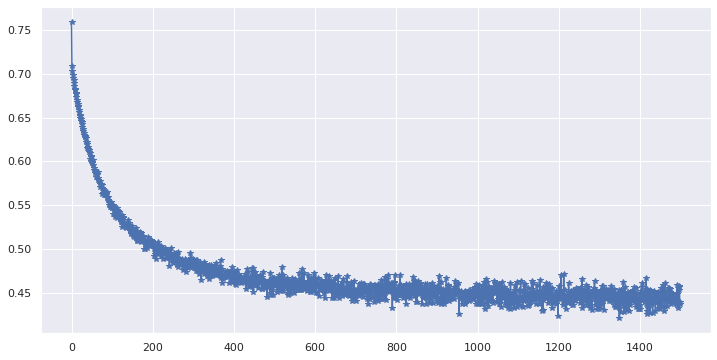

train Accuracy: 0.8110; test Accuracy: 0.8026
True Positives:4550	False Positives:1224
False Negatives:684	True Negatives:3208
Accuracy:0.8026
Recall:0.8693	Precision:0.7880
f1 measure:0.8267


In [12]:
regr = LogisticRegression(learning_rate=0.9,epochs=1500,batch_size=5000)

regr.fit (X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

Посмотрим веса

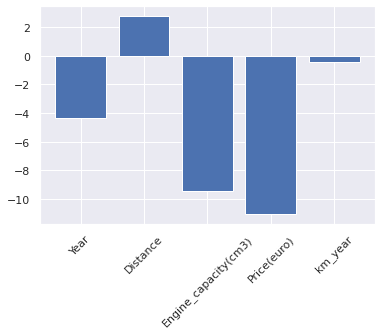

In [13]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Проведем тест с регуляризацией L2

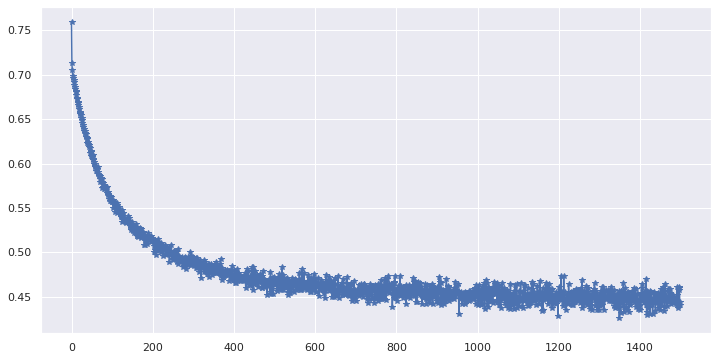

train Accuracy: 0.8081; test Accuracy: 0.8014
True Positives:4541	False Positives:1227
False Negatives:693	True Negatives:3205
Accuracy:0.8014
Recall:0.8676	Precision:0.7873
f1 measure:0.8255


In [14]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l2_penalty = 0.0001)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

Метрики Accurancy, Recall ,Precision  близки к 0.8.  Модель работает хорошо

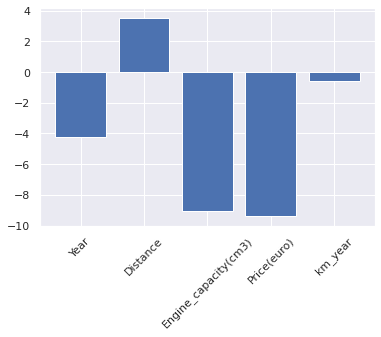

In [15]:
#Посмотрим веса
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимы признак Price (euro)

Проведем тест с L1 регуляризацией

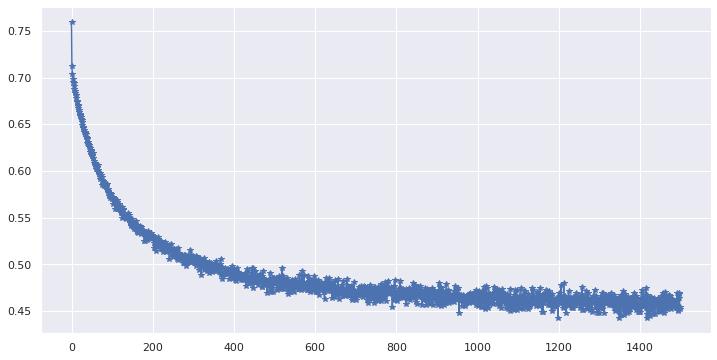

train Accuracy: 0.8114; test Accuracy: 0.8028
True Positives:4615	False Positives:1287
False Negatives:619	True Negatives:3145
Accuracy:0.8028
Recall:0.8817	Precision:0.7819
f1 measure:0.8288


In [16]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l1_penalty = 0.005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

Метрики Accurancy, Recall ,Precision  близки к 0.8.  Модель работает хорошо

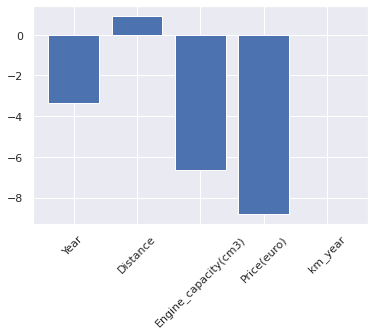

In [17]:
#Посмотрим веса
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый признак Price (euro)

# **Методы предварительной обработки данных**

## **Стандартизация**

### **Загрузка данных на Google Drive**

загружаем файл после стандартизации из задания 1

In [152]:
uploaded = files.upload()

Saving cars_moldova_scaled.csv to cars_moldova_scaled.csv


### **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [165]:
df = pd.read_csv('/content/cars_moldova_scaled.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,0.381957,Hatchback,0.134535,-0.109715,Hybrid,Automatic,-0.175083
1,Renault,Grand Scenic,0.796093,Universal,-0.470752,-0.601963,Diesel,Manual,-0.091023
2,Renault,Laguna,0.520002,Universal,-0.722955,-0.601963,Diesel,Manual,-0.301174
3,Opel,Astra,-0.308271,Universal,0.184975,-0.437881,Metan/Propan,Manual,-0.558610
4,Mercedes,Vito,-1.136544,Microvan,1.193787,0.546615,Diesel,Manual,-0.622706
...,...,...,...,...,...,...,...,...,...
32529,Volkswagen,Passat,1.072185,Sedan,-0.944893,-0.109715,Petrol,Automatic,0.218951
32530,Land Rover,Freelander,-0.860453,Crossover,0.437178,-0.109715,Metan/Propan,Manual,-0.527087
32531,Dacia,Logan Mcv,0.934139,Universal,-0.934805,-0.601963,Diesel,Manual,-0.253890
32532,Mazda,6,-0.308271,Combi,1.899955,0.218450,Diesel,Manual,-0.569118


In [166]:
df.info()  # общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  float64
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.2+ MB


In [167]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


### **Логистическая регрессия**

In [173]:
X_scaled = df[num_columns].values 
y_scaled = df["Transmission"].values 
features_names = df[num_columns].columns

#разбиваем данные на тренировочные и тестовые
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X, y, test_size=0.3, random_state=50)


scaler  = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_scaled_train)
X_scaled_test  = scaler.transform(X_scaled_test) 
pd.DataFrame(X_scaled_train).tail()

,0,1,2,3,4
22549,0.76,0.124912,0.250000,0.062657,0.190689
22550,0.82,0.138914,0.166667,0.053634,0.276553
22551,0.94,0.065807,0.250000,0.122807,0.328156
22552,0.78,0.200920,0.270833,0.047619,0.333667
22553,0.82,0.091456,0.165625,0.037584,0.181457


Записываем логистическую регрессию

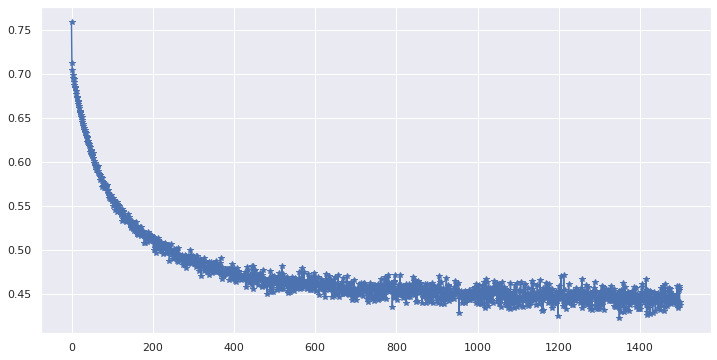

train Accuracy: 0.8111; test Accuracy: 0.8025
True Positives:4546	False Positives:1221
False Negatives:688	True Negatives:3211
Accuracy:0.8025
Recall:0.8686	Precision:0.7883
f1 measure:0.8265


In [174]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_scaled_train, y_scaled_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_scaled_train, y_scaled_train), regr.score(X_scaled_test, y_scaled_test)))

regr.classification_report(X_scaled_test, y_scaled_test)

Значение метрик высоко ( около 0.8) , доля ложноположительных и ложноотрицательных ответов не увеличилась после стандартизации

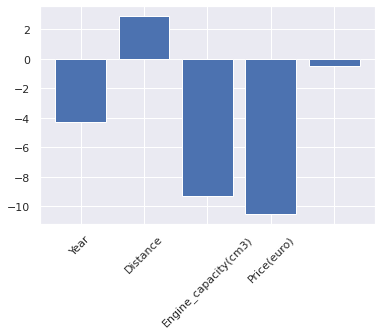

In [175]:
#построим веса
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый показатель Price(euro)

Проведем тест с регуляризацией L2

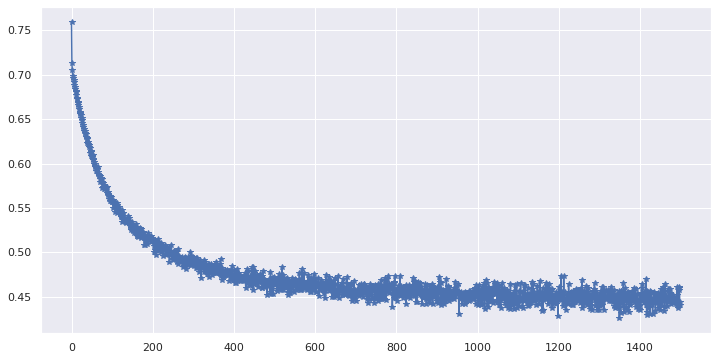

train Accuracy: 0.8081; test Accuracy: 0.8014
True Positives:4541	False Positives:1227
False Negatives:693	True Negatives:3205
Accuracy:0.8014
Recall:0.8676	Precision:0.7873
f1 measure:0.8255


In [180]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l2_penalty = 0.0001)

regr.fit(X_scaled_train, y_scaled_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_scaled_train, y_scaled_train), regr.score(X_scaled_test, y_scaled_test)))

regr.classification_report(X_scaled_test, y_scaled_test)

## **Нормализация**

### **Загрузка данных на Google Drive**

загружаем файл после нормализации из задания 1

In [171]:
uploaded = files.upload()

Saving cars_moldova_norm.csv to cars_moldova_norm (1).csv


### **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [176]:
df = pd.read_csv('/content/cars_moldova_norm.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,0.80,Hatchback,0.194919,0.333333,Hybrid,Automatic,0.075651,0.20,0.353252
1,Renault,Grand Scenic,0.86,Universal,0.134913,0.270833,Diesel,Manual,0.083667,0.14,0.336172
2,Renault,Laguna,0.82,Universal,0.109911,0.270833,Diesel,Manual,0.063627,0.18,0.218437
3,Opel,Astra,0.70,Universal,0.199920,0.291667,Metan/Propan,Manual,0.039078,0.30,0.248497
4,Mercedes,Vito,0.58,Microvan,0.299930,0.416667,Diesel,Manual,0.032966,0.42,0.271270
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,0.90,Sedan,0.087909,0.333333,Petrol,Automatic,0.113226,0.10,0.291917
32216,Land Rover,Freelander,0.62,Crossover,0.224922,0.333333,Metan/Propan,Manual,0.042084,0.38,0.223447
32217,Dacia,Logan Mcv,0.88,Universal,0.088909,0.270833,Diesel,Manual,0.068136,0.12,0.252791
32218,Mazda,6,0.70,Combi,0.369937,0.375000,Diesel,Manual,0.038076,0.30,0.461423


### **Логистическая регрессия**

In [18]:
X_norm = df[num_columns].values 
y_norm = df["Transmission"].values 
features_names = df[num_columns].columns

#разбиваем данные на тренировочные и тестовые
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X, y, test_size=0.3, random_state=50)


scaler  = MinMaxScaler()
X_norm_train = scaler.fit_transform(X_norm_train)
X_norm_test  = scaler.transform(X_norm_test) 
pd.DataFrame(X_norm_train).tail()

,0,1,2,3,4
22549,0.76,0.124912,0.250000,0.062657,0.190689
22550,0.82,0.138914,0.166667,0.053634,0.276553
22551,0.94,0.065807,0.250000,0.122807,0.328156
22552,0.78,0.200920,0.270833,0.047619,0.333667
22553,0.82,0.091456,0.165625,0.037584,0.181457


Записываем логистическую регрессию

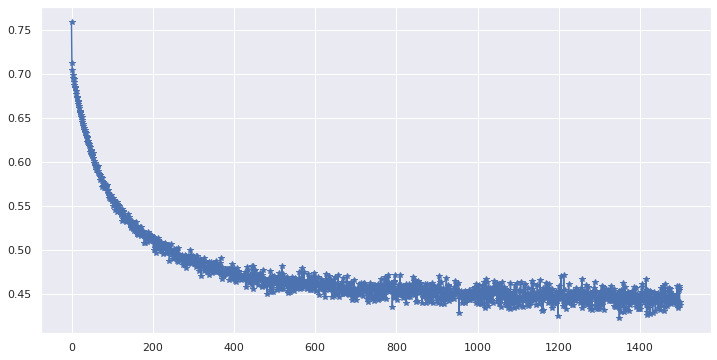

train Accuracy: 0.8111; test Accuracy: 0.8025
True Positives:4546	False Positives:1221
False Negatives:688	True Negatives:3211
Accuracy:0.8025
Recall:0.8686	Precision:0.7883
f1 measure:0.8265


In [19]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_norm_train, y_norm_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_norm_train, y_norm_train), regr.score(X_norm_test, y_norm_test)))

regr.classification_report(X_norm_test, y_norm_test)

Значение метрик высоко ( около 0.8) , доля ложноположительных и ложноотрицательных ответов не увеличилась после нормализации данных

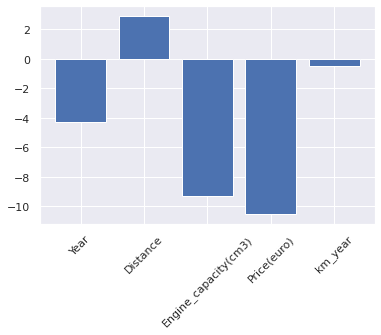

In [20]:
#построим веса
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый показатель Price(euro)

Вывод: результаты при стандрартизации и нормализации совпадают

## **One-hot кодирование**

### **Загрузка данных на Google Drive**

загружаем файл после обработки данных из задания 1

In [21]:
uploaded = files.upload()

Saving cars_moldova_onehot.csv to cars_moldova_onehot.csv


### **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [22]:
df = pd.read_csv('/content/cars_moldova_onehot.csv', delimiter = ',')
df

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Make_ARO,Make_Abarth,Make_Acura,Make_Alfa Romeo,Make_Alta marca,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
0,2011,195000.0,1800.0,1,7750.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2014,135000.0,1500.0,0,8550.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1998,1.0,1400.0,0,2200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2012,110000.0,1500.0,0,6550.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,2006,200000.0,1600.0,0,4100.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37259,2002,225000.0,1800.0,0,4400.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37260,2015,89000.0,1500.0,0,7000.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
37261,2009,225.0,1500.0,0,4500.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
37262,2006,370000.0,2000.0,0,4000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
df.info()  # общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Columns: 939 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: float64(3), int64(936)
memory usage: 267.0 MB


In [36]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  [] 
 Число столблцов =  0
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission', 'Price(euro)', 'Make_ARO', 'Make_Abarth', 'Make_Acura', 'Make_Alfa Romeo', 'Make_Alta marca', 'Make_Aston Martin', 'Make_Audi', 'Make_BAIC', 'Make_BMW', 'Make_Bentley', 'Make_Brilliance', 'Make_Buick', 'Make_Byd', 'Make_Cadillac', 'Make_Changan', 'Make_Chery', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Citroen', 'Make_Dacia', 'Make_Daewoo', 'Make_Daihatsu', 'Make_Datsun', 'Make_Dodge', 'Make_Faw', 'Make_Ferrari', 'Make_Fiat', 'Make_Ford', 'Make_GAZ', 'Make_GMC', 'Make_Geely', 'Make_Great Wall', 'Make_Groz', 'Make_Haima', 'Make_Haval', 'Make_Honda', 'Make_Hummer', 'Make_Hyundai', 'Make_Infiniti', 'Make_Isuzu', 'Make_Jac', 'Make_Jaguar', 'Make_Jeep', 'Make_KIA', 'Make_Lada', 'Make_Lamborghini', 'Make_Lancia', 'Make_Land Rover', 'Make_Lexus', 'Make_Lifan', 'Make_Lincoln', 'Make_LuAZ', 'Make_Maserati', 'Make_Mazda', 'Make_McLaren', 'Make_Mercedes', 'Make_Mercedes

### **Логистическая регрессия**

In [44]:
#Разбиваем данные на тестовую и тренировочную выборки
df_num = df[num_columns].copy()
X = df_num.drop(columns = ["Transmission"]).values
y = df["Transmission"].values 
features_names = df_num.drop(columns = ["Transmission"]).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8,9,...,928,929,930,931,932,933,934,935,936,937
26079,0.867769,0.001870,0.150015,0.00021,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
26080,0.752066,0.002993,0.159516,0.00013,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26081,0.884298,0.002600,0.149715,0.00029,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26082,0.867769,0.001091,0.138814,0.00043,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26083,0.909091,0.002841,0.250025,0.00135,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Проведем тестирование без регуляризации

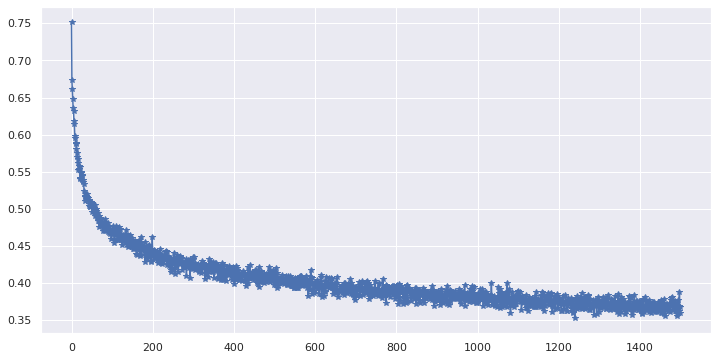

train Accuracy: 0.8412; test Accuracy: 0.8348
True Positives:3939	False Positives:729
False Negatives:1118	True Negatives:5394
Accuracy:0.8348
Recall:0.7789	Precision:0.8438
f1 measure:0.8101


In [51]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

Доля правильных ответов высока

Посмотрим  веса

In [47]:
w, b = regr.get_w_and_b()
plt.figure(figsize=(199,150))
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Проведем тест с регуляризацией L2

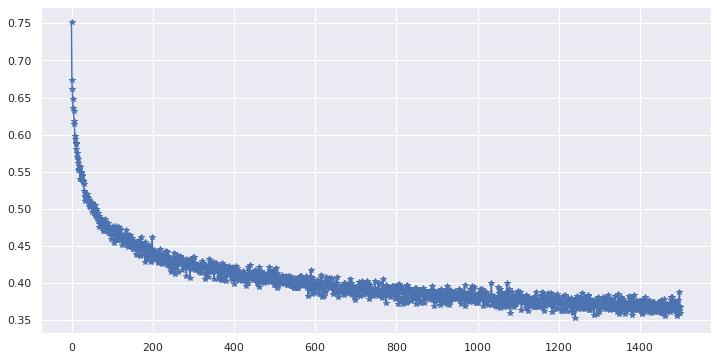

train Accuracy: 0.8412; test Accuracy: 0.8348
True Positives:3939	False Positives:729
False Negatives:1118	True Negatives:5394
Accuracy:0.8348
Recall:0.7789	Precision:0.8438
f1 measure:0.8101


In [49]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l2_penalty = 0.001)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

Доля правильных ответов высока, значение метрик accurancy, recall,precision около 0.8. Метрики совпадают с данными при тестировании без регуляризации

In [50]:
w, b = regr.get_w_and_b()
plt.figure(figsize=(199,100))
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

При использовании различных методов обработки данных и тестировании результаты примерно одинаковы: наиболее значивые показатель Price (euro),  метрики acuurancy, recall ,precision около 0.8, доля верных ответов высока